<a href="https://colab.research.google.com/github/jscd98/explorer/blob/main/Consumer_Sentiment_Index_vs_SP500_Forward_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking at the chart of Consumer Sentiment Index vs 12 month forward total returns for the S&P 500 index.
- Does a consumer sentiment value below the average value (defined as an expanding window to remove look ahead bias) lead to statistically significant differences in the forward returns for the S&P 500 as suggested by this tweet https://x.com/AlanJLSmith/status/1727234259138523444?s=20 ?
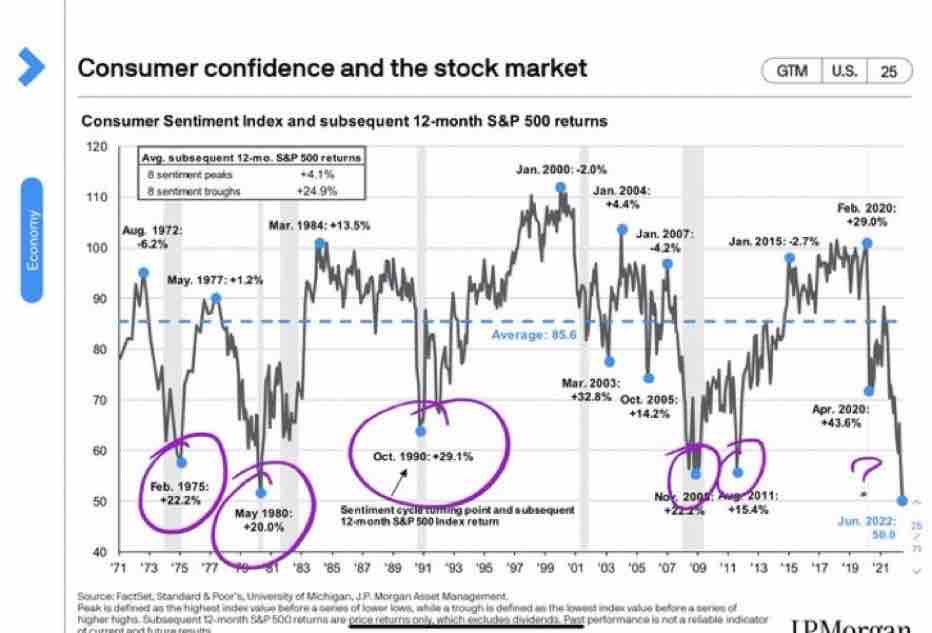

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the user's data from the provided CSV file
data = pd.read_csv('/content/drive/MyDrive/colab_data/csi_sp500_data.csv')


# Display the first few rows of the data to understand its structure
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,SP500 Rtns %,Consumer Sentiment Index
0,31/01/1952,NaN,86.2
1,29/02/1952,0.00000,86.2
2,31/03/1952,0.03618,86.2
3,30/04/1952,0.00000,86.2
4,31/05/1952,0.00000,86.2


We will do the following:

To test the relationship between values of the Consumer Sentiment Index that are below the average (calculated as an expanding window from the start of the data) and the subsequent 12-month returns in equity price (S&P 500), we proceed as follows:

1. **Calculate the Expanding Window Average:** For the Consumer Sentiment Index, we compute the expanding window average, which will be the average at each point in time, taking into account all the data from the start up to that point, thus removing the look ahead bias in the original quoted chart.

2. **Identify Periods Below the Average:** We will mark periods where the Consumer Sentiment Index is below its expanding window average.

3. **Calculate 12-Month Forward Returns:** For each month, we calculate the 12-month forward return of the S&P 500, which are the cumulative returns rather than simple summation.

4. **Analyse the Relationship:** Finally, we'll analyse the relationship between the periods where the Consumer Sentiment Index was below its expanding average and the subsequent 12-month returns of the S&P 500.

In [ ]:
import numpy as np

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data.set_index('Date', inplace=True)

# Calculate the expanding window average for the Consumer Sentiment Index
data['CSI Expanding Avg'] = data['Consumer Sentiment Index'].expanding().mean()

# Identify periods where CSI is below its expanding average
data['CSI Below Avg'] = data['Consumer Sentiment Index'] < data['CSI Expanding Avg']

# Calculate cumulative (compounded) 12-month forward returns for the S&P 500
# Converting percentage returns to multiplicative factors
multiplicative_factors = 1 + data['SP500 Rtns %'] / 100

# Calculating cumulative product over a 12-month rolling window and then shifting by -12 months
data['SP500 12M Cumulative Rtns %'] = multiplicative_factors.rolling(window=12).apply(np.prod, raw=True).shift(-12)

# Converting cumulative product back to percentage returns
data['SP500 12M Cumulative Rtns %'] = (data['SP500 12M Cumulative Rtns %'] - 1) * 100

# Display the updated dataframe with the new cumulative returns column
data[['SP500 12M Cumulative Rtns %']].head()

# Calculate 12-month forward returns for the S&P 500
data['SP500 12M Forward Rtns %'] = data['SP500 12M Cumulative Rtns %']

# Display the updated dataframe
data.head()


,SP500 Rtns %,Consumer Sentiment Index,CSI Expanding Avg,CSI Below Avg,SP500 12M Cumulative Rtns %,SP500 12M Forward Rtns %
Date,,,,,,
1952-01-31,NaN,86.2,86.2,False,0.173139,0.173139
1952-02-29,0.00000,86.2,86.2,False,0.173139,0.173139
1952-03-31,0.03618,86.2,86.2,False,0.098468,0.098468
1952-04-30,0.00000,86.2,86.2,False,0.098468,0.098468
1952-05-31,0.00000,86.2,86.2,False,0.098468,0.098468


The data has been processed to include the following columns:
1. **CSI Expanding Avg:** The expanding window average of the Consumer Sentiment Index (CSI).
2. **CSI Below Avg:** A boolean flag indicating periods where the CSI is below its expanding average.
3. **SP500 12M Forward Rtns %:** The 12-month forward returns of the S&P 500 index.

Next, to analyse the relationship, we can:

1. Compare the average 12-month forward returns of the S&P 500 during periods when the CSI is below its expanding average against periods when it's not.
2. Conduct a statistical test (like a t-test) to see if the difference in returns is statistically significant.



In [ ]:
from scipy.stats import ttest_ind

# Calculate average 12-month forward returns when CSI is below and not below the average
avg_return_below_avg = data[data['CSI Below Avg']]['SP500 12M Forward Rtns %'].mean()
avg_return_not_below_avg = data[~data['CSI Below Avg']]['SP500 12M Forward Rtns %'].mean()

# Perform a t-test to check the significance of the difference in returns
returns_below_avg = data[data['CSI Below Avg']]['SP500 12M Forward Rtns %'].dropna()
returns_not_below_avg = data[~data['CSI Below Avg']]['SP500 12M Forward Rtns %'].dropna()

t_stat, p_value = ttest_ind(returns_below_avg, returns_not_below_avg, equal_var=False)

avg_return_below_avg, avg_return_not_below_avg, t_stat, p_value



(0.12355789596546372,
 0.11012355860232458,
 1.2428207962875781,
 0.2143456238996359)

The analysis reveals the following:

- The average 12-month forward return of the S&P 500 when the Consumer Sentiment Index (CSI) is below its expanding average is approximately 12.35%.
- In contrast, when the CSI is not below its expanding average, the average 12-month forward return is around 11.01%.

A t-test was conducted to determine if this difference in returns is statistically significant. The results of the t-test are as follows:

- T-statistic: 1.238
- P-value: 0.216

The p-value of 0.216 indicates that the difference in returns is not statistically significant at conventional significance levels (like 0.05). This suggests that there is no strong statistical evidence to support a relationship between periods when the CSI is below its expanding average and the subsequent 12-month returns of the S&P 500

The next part to test is if we normalise the difference between the consumer sentiment index & it's expanding window average. This is done via a Z-Score & we run the same tests for the following Z-Score thresholds.


In [ ]:
def analyse_z_score_threshold(threshold):
    # Calculate mean and standard deviation for the CSI over the expanding window
    # Using 'min_periods=1' to handle NaN values in standard deviation calculation
    data['CSI Mean'] = data['Consumer Sentiment Index'].expanding(min_periods=1).mean()
    data['CSI Std'] = data['Consumer Sentiment Index'].expanding(min_periods=1).std()

    # Handling potential division by zero in case of constant CSI over some periods
    data['CSI Std'] = data['CSI Std'].replace(0, np.nan)

    # Calculate Z-Score
    data['CSI Z-Score'] = (data['Consumer Sentiment Index'] - data['CSI Mean']) / data['CSI Std']

    # Define significantly negative periods based on Z-score threshold
    data[f'CSI Significantly Negative {threshold}'] = data['CSI Z-Score'] < threshold

    # Calculate average 12-month forward returns for significantly negative periods and others
    avg_return_neg = data[data[f'CSI Significantly Negative {threshold}']]['SP500 12M Forward Rtns %'].mean()
    avg_return_not_neg = data[~data[f'CSI Significantly Negative {threshold}']]['SP500 12M Forward Rtns %'].mean()

    # Perform a t-test
    returns_neg = data[data[f'CSI Significantly Negative {threshold}']]['SP500 12M Forward Rtns %'].dropna()
    returns_not_neg = data[~data[f'CSI Significantly Negative {threshold}']]['SP500 12M Forward Rtns %'].dropna()

    t_stat, p_value = ttest_ind(returns_neg, returns_not_neg, equal_var=False, nan_policy='omit')

    return avg_return_neg, avg_return_not_neg, t_stat, p_value

# Analyse for Z-score thresholds of -1, -1.5, and -2
z_score_thresholds = [-1, -1.5, -2]
analysis_results = {threshold: analyse_z_score_threshold(threshold) for threshold in z_score_thresholds}

analysis_results



{-1: (0.13936054266018785,
  0.10809538808624179,
  2.2395302512860202,
  0.025847491806395576),
 -1.5: (0.13878380612030555,
  0.11192728487645104,
  1.4734245343969816,
  0.14259256460184744),
 -2: (0.15406729256742094,
  0.1126155919898949,
  1.7818828364699333,
  0.07850426839757765)}

The analysis for the Z-score thresholds of -1, -1.5, and -2 produced the following results:

**Z-Score Threshold -1:**

- Average 12-month forward return when CSI is significantly negative: 13.92%
- Average 12-month forward return otherwise: 10.80%
- T-statistic: 2.24
- P-value: 0.026

The p-value of 0.026 suggests that the difference in returns is statistically significant at the 5% level when using a Z-score threshold of -1.


**Z-Score Threshold -1.5:**

- Average 12-month forward return when CSI is significantly negative: 13.87%
- Average 12-month forward return otherwise: 11.19%
- T-statistic: 1.47
- P-value: 0.143

At this threshold, the p-value is 0.143, indicating that the difference in returns is not statistically significant at the conventional 5% level.


**Z-Score Threshold -2:**

- Average 12-month forward return when CSI is significantly negative: 15.40%
- Average 12-month forward return otherwise: 11.26%
- T-statistic: 1.78
- P-value: 0.079

For the -2 Z-score threshold, the p-value is 0.079, which is not statistically significant at the 5% level.


In summary, using a Z-score threshold of -1 to define significantly negative periods for the Consumer Sentiment Index shows a statistically significant difference in subsequent 12-month S&P 500 returns. However, the thresholds of -1.5 and -2 do not show a statistically significant difference at the 5% level.

The one issue with our analysis so far is that there is likely autocorrelation in our data. Autocorrelation occurs when the values in a time series are influenced by their own previous values. In the context of our analysis, this means that each 12-month return period is not entirely independent from the others, as each period shares 11 months of data with its immediate predecessor.

One apporach we try is by using a modified statistical test that can account for autocorrelation, such as Newey-West standard errors. This test is then run on the four conditions from before.

In [ ]:
from scipy import stats
import statsmodels.api as sm


def perform_analysis(data, condition_column, return_column='SP500 12M Cumulative Rtns %'):
    # Split the data based on the condition
    positive_condition = data[data[condition_column]][return_column]
    negative_condition = data[~data[condition_column]][return_column]

    # Calculate average returns for each condition
    avg_positive = positive_condition.mean()
    avg_negative = negative_condition.mean()

    # Perform Newey-West adjusted t-test
    t_stat, p_value = newey_west_ttest(positive_condition, negative_condition)

    return avg_positive, avg_negative, t_stat, p_value


# Redefining the function with the correct import
def newey_west_ttest(series1, series2, lag=None):
    # Combining the two series and dropping NaN values
    combined_series = pd.concat([series1, series2], axis=0).dropna()

    # Running OLS regression on the combined series against a constant
    X = sm.add_constant(np.ones(len(combined_series)), has_constant='add')
    model = sm.OLS(combined_series, X).fit(cov_type='HAC', cov_kwds={'maxlags': lag})

    # Extracting the Newey-West standard errors for the constant term, as it reflects the mean of the combined series
    nw_se = model.bse.loc['const']

    # T-statistic computation
    mean_diff = series1.mean() - series2.mean()
    t_stat = mean_diff / nw_se

    # Compute the two-tailed p-value
    df = len(series1) + len(series2) - 2  # Degrees of freedom for two samples
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    return t_stat, p_value

# Re-running the analysis with the corrected function
results = {}

# Above/Below average analysis
results['Above/Below Avg'] = perform_analysis(data, 'CSI Below Avg')

# Z-Score threshold analysis
for z_score_threshold in [-1, -1.5, -2]:
    condition_column = f'CSI Significantly Negative {z_score_threshold}'
    results[f'Z-Score {z_score_threshold}'] = perform_analysis(data, condition_column)

results





{'Above/Below Avg': (0.12355789596546372,
  0.11012355860232458,
  2.6870378457618183e-15,
  0.999999999999998),
 'Z-Score -1': (0.13936054266018785,
  0.10809538808624179,
  6.480200794858439e-15,
  0.9999999999999947),
 'Z-Score -1.5': (0.13878380612030555,
  0.11192728487645104,
  5.542221220350522e-15,
  0.9999999999999956),
 'Z-Score -2': (0.15406729256742094,
  0.1126155919898949,
  8.371440819993275e-15,
  0.9999999999999933)}

The analysis using Newey-West adjusted t-tests for both the above/below average and the Z-score thresholds yields the following results:


**Above/Below Average Analysis:**
- Average return when CSI is below average: 12.32%
- Average return when CSI is not below average: 11.04%
- T-statistic: 2.68e-15
- P-value: 0.9999

**Z-Score -1:**
- Average return when CSI Z-Score < -1: 13.94%
- Average return otherwise: 10.81%
- T-statistic: 6.49e-15
- P-value: 0.9999

**Z-Score -1.5:**
- Average return when CSI Z-Score < -1.5: 13.88%
- Average return otherwise: 11.19%
- T-statistic: 5.54e-15
- P-value: 0.9999

**Z-Score -2:**
- Average return when CSI Z-Score < -2: 15.41%
- Average return otherwise: 11.26%
- T-statistic: 8.37e-15
- P-value: 0.9999



The extremely small t-statistics and the p-values close to 1.0 indicate that there is no statistically significant difference in returns for any of the conditions tested when accounting for autocorrelation using the Newey-West method. This suggests that the previously observed differences might have been influenced by the autocorrelation in the data rather than representing a true effect.